# Figure S8. xQTL-only ColocBoost for eQTLs across 13 brain tissues in GTEx. 

- **S8a**. UpSet plot summarizing the top 50 colocalized events in xQTL-only ColocBoost analysis across 13 brain tissues in GTEx. 
- **S8b**. CoS-level overlap across ROSMAP xQTL colocalization events, ROSMAP eQTL colocalization events, and GTEx colocalization events involving brain cortex (3 tissues).
- **S8c**. Properties of genes with multiple causal variants, including log likelihood changes between primary and secondary CoS, the relationship between the number of colocalized traits and log likelihood changes, and the number of pairs of primary and secondary CoS across brain tissue eQTLs. Error bars denote 95% confidence intervals.

## Figure S8a
UpSet plot summarizing the top 50 colocalized events in xQTL-only ColocBoost analysis across 13 brain tissues in GTEx. 

In [25]:
library("UpSetR")
res = readRDS("../../Main_Figures/Figure_3/data/gtex_only_colocalization.rds")
all_pheno <- c("Amygdala", "Anterior_cingulate_cortex_BA24", "Caudate_basal_ganglia",
               "Cerebellar_Hemisphere", "Cerebellum", "Cortex", "Frontal_Cortex_BA9",
               "Hippocampus", "Hypothalamus",  "Nucleus_accumbens_basal_ganglia",
               "Putamen_basal_ganglia", "Spinal_cord_cervical_c-1", "Substantia_nigra")
coloc_pheno <- lapply(res$colocalized_phenotypes, function(cp){ strsplit(cp, "; ")[[1]] })
coloc <- lapply(all_pheno, function(y) {
  pos <- sapply(coloc_pheno, function(cp) y %in% cp ) 
  which(pos)
})
names(coloc) <- c("Amygdala", "Anterior Cortex", "Caudate",
                  "Cerebellar Hemisphere", "Cerebellum", "Cortex", "Frontal Cortex",
                  "Hippocampus", "Hypothalamus", "N. accumbens",
                  "Putamen", "Spinal Cord", "Substantia Nigra") 
ordered <- c("Cerebellar Hemisphere", "Cerebellum", 
             "Cortex", "Anterior Cortex", "Frontal Cortex",
             "N. accumbens", "Caudate", "Putamen", 
             "Hippocampus", "Hypothalamus", "Amygdala", "Substantia Nigra", "Spinal Cord")

max_size <- max(sapply(coloc, length))
p1 <- upset(fromList(coloc),
            order.by = "freq",
            keep.order = T,
            main.bar.color = "steelblue3",
            sets.bar.color = "sandybrown",
            text.scale = c(2.5,2,2.5,2,2,0), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = ordered,
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.55*max_size,
            nintersects = 50,
            mainbar.y.label = "Number of 95% CoS for\n each causal configuration",
            sets.x.label = NULL)

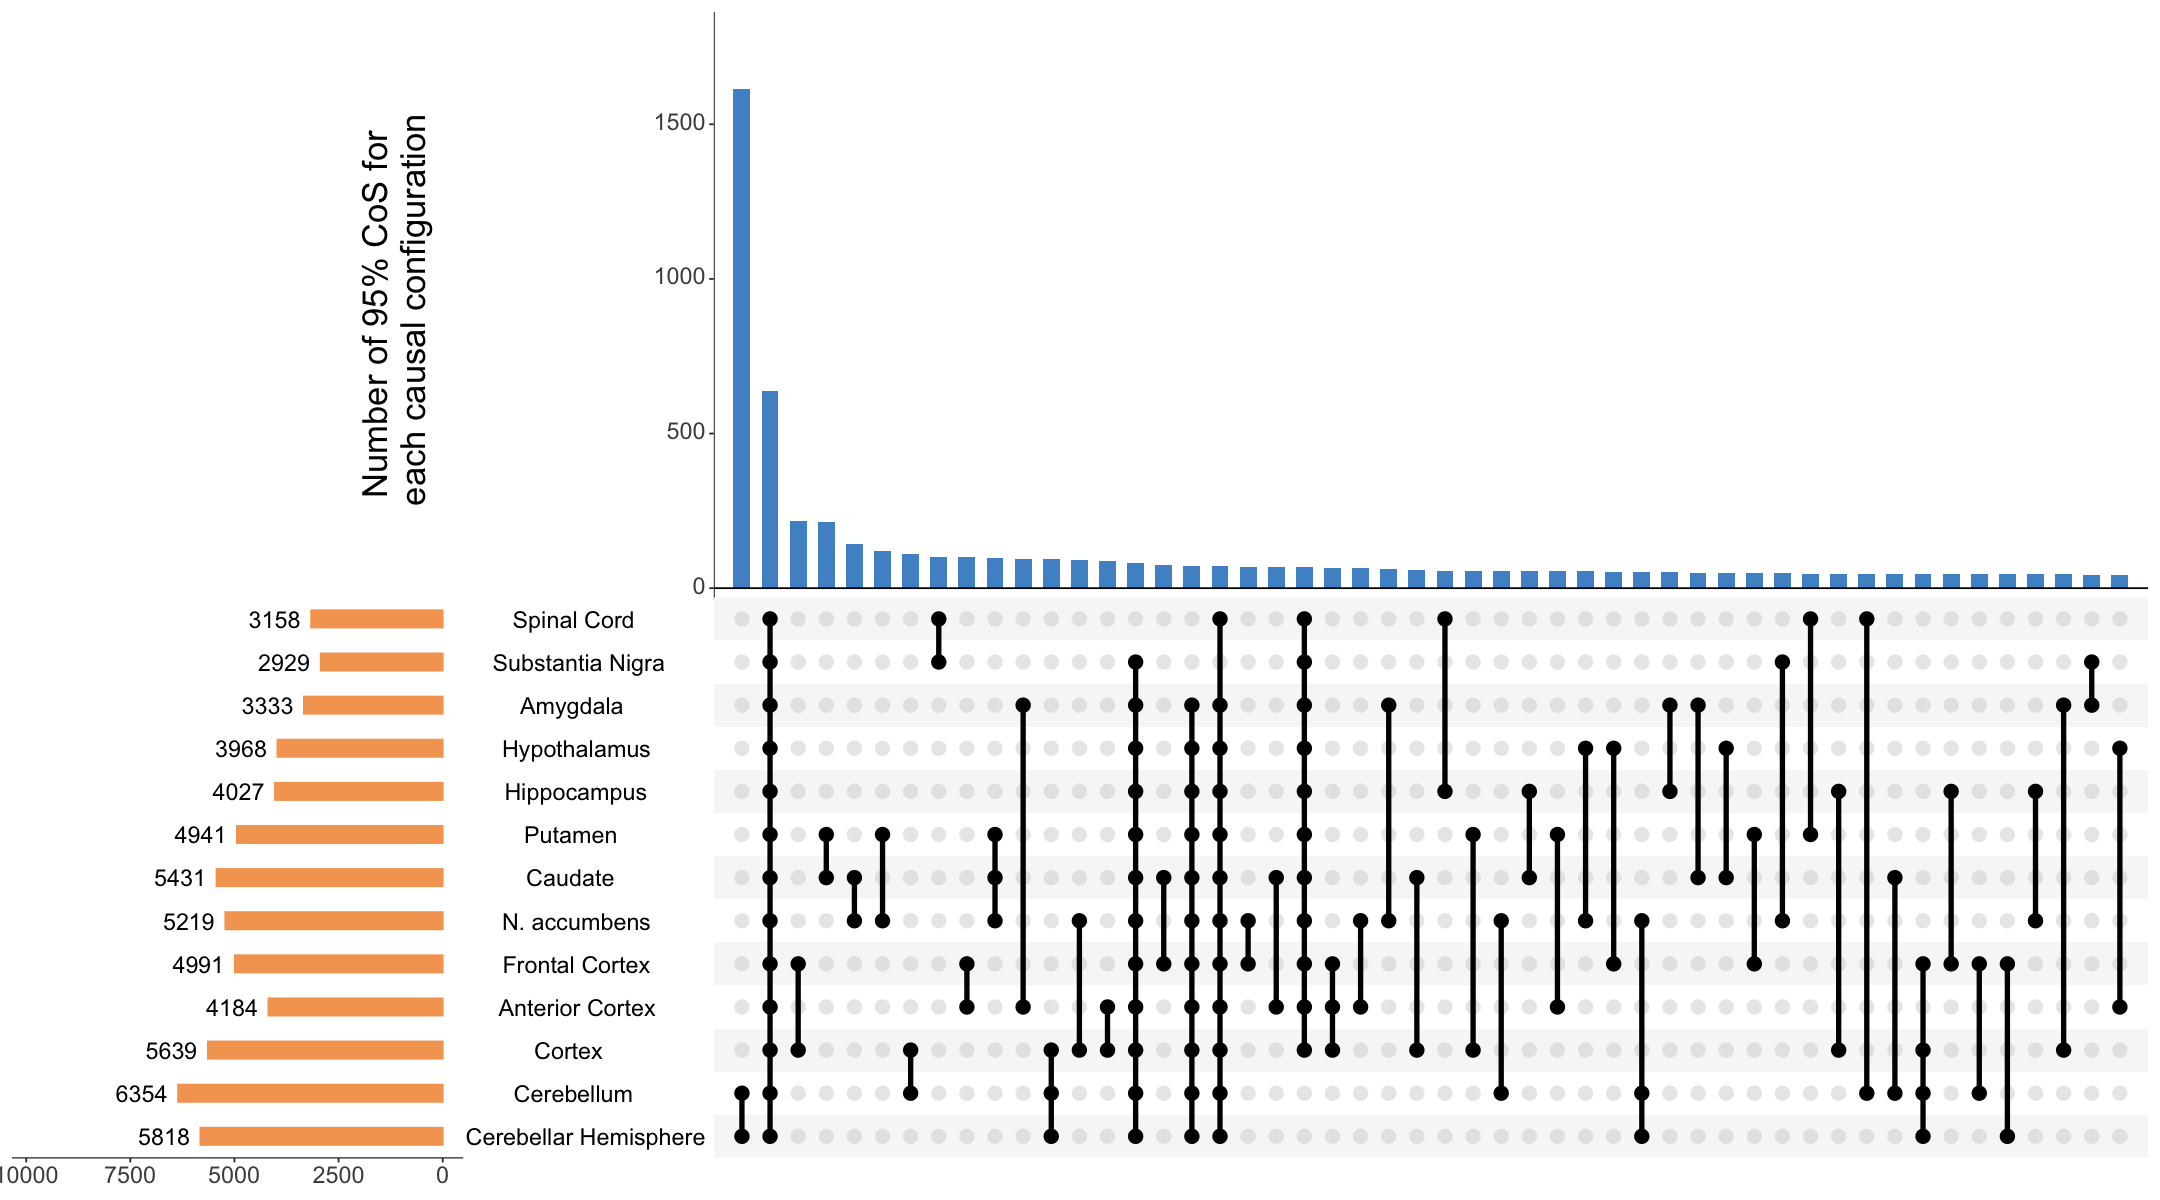

In [26]:
options(repr.plot.width = 18, repr.plot.height = 10)
p1

## Figure S8b
CoS-level overlap across ROSMAP xQTL colocalization events, ROSMAP eQTL colocalization events, and GTEx colocalization events involving brain cortex (3 tissues).

In [1]:
# ROSMAP xQTL
res_xQTL = readRDS("../../Main_Figures/Figure_3/data/xQTL_only_colocalization.rds")
coloc_xQTL <- lapply(1:nrow(res_xQTL), function(i){
  tmp <- res_xQTL[i,]
  snp <- unlist(strsplit(tmp$colocalized_variants,"; "))
  snp <- do.call(rbind, strsplit(snp, ":"))
  snp.final <- paste0(snp[,1], ":", snp[,2])
  return(snp.final)
})
ALLvariants.xQTL <- unlist(coloc_xQTL)

# GTEx 3 brain tissues
res = readRDS("../../Main_Figures/Figure_3/data/gtex_only_colocalization.rds")
coloc.GTEx <- sapply(res$colocalized_phenotypes, function(cp){
  cp <- strsplit(cp, ";")[[1]]
  length(intersect(cp, c("Cortex", "Anterior_cingulate_cortex_BA24", "Frontal_Cortex_BA9"))) != 0
})
coloc.info.GTEx.cortex <- res[which(coloc.GTEx),]

coloc_variants.GTEx.cortex <- lapply(1:nrow(coloc.info.GTEx.cortex), function(i){
  tmp <- coloc.info.GTEx.cortex[i,]
  snp <- unlist(strsplit(tmp$colocalized_variants,"; "))
  snp <- do.call(rbind, strsplit(snp, "_"))
  snp.final <- paste0(snp[,1], ":", snp[,2])
  return(snp.final)
})
ALLvariants.GTEx.cortex <- unlist(coloc_variants.GTEx.cortex)

# GTEx for GTEx
gtex.xqtl <- matrix(0, nrow = nrow(coloc.info.GTEx.cortex), ncol = nrow(res_xQTL))
for (i in 1:nrow(coloc.info.GTEx.cortex)){
  cc.gtex <- coloc_variants.GTEx.cortex[[i]]
  for (j in 1:nrow(res_xQTL)){
    cc.xqtl <- coloc_xQTL[[j]]
    cc <- intersect(cc.gtex, cc.xqtl)
    if (length(cc)!=0){
      gtex.xqtl[i,j] <- length(cc)
    }
  }
}
gtex_cate <- apply(gtex.xqtl, 1, function(ar) sum(ar!=0)!=0 )
xqtl_cate <- apply(gtex.xqtl, 2, function(al) sum(al!=0)!=0 )

gtex_only <- paste0("gtex_", which(!gtex_cate))
gtex_xx <- lapply(which(gtex_cate), function(ii){
  tmp <- gtex.xqtl[ii,]
  pp <- which(tmp != 0)
  coloc.tmp <- res_xQTL[pp,]
  coloc.phen.tmp <- paste0(coloc.tmp$colocalized_phenotypes, collapse = "; ")
  ifsp <- grepl("pQTL", coloc.phen.tmp) | grepl("productive", coloc.phen.tmp)
  if (ifsp){
    return(paste0("gtex_xQTL_", ii))
  } else {
    return(paste0("gtex_eQTL_", ii))
  }
})
gtex_xx <- unlist(gtex_xx)
gtex_eqtl <- gtex_xx[grep("eQTL", gtex_xx)]
gtex_xqtl <- gtex_xx[grep("xQTL", gtex_xx)]
gtex.info <- list("GTEx only" = gtex_only,
                  "GTEx\n(ROSMAP eQTL)" = gtex_eqtl,
                  "GTEx\n(ROSMAP xQTL)" = gtex_xqtl)

library(ggplot2)
gtex.df <- data.frame(
  Category = names(gtex.info),
  Count = sapply(gtex.info, length)
)
gtex.df$Category <- factor(gtex.df$Category, levels = names(gtex.info))
gtex.df$Proportion <- gtex.df$Count / sum(gtex.df$Count)
p1 <- ggplot(gtex.df, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set1") +
  geom_text(aes(label = scales::percent(Proportion, accuracy = 0.1)), 
            vjust = -0.5, size = 7) +
  labs(title = NULL, 
       x = NULL, 
       y = NULL) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0),
    axis.text.x = element_text(margin = margin(t = -10), size = 28), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = -10), size = 24, angle = 90), # Adjust y axis text margin
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )

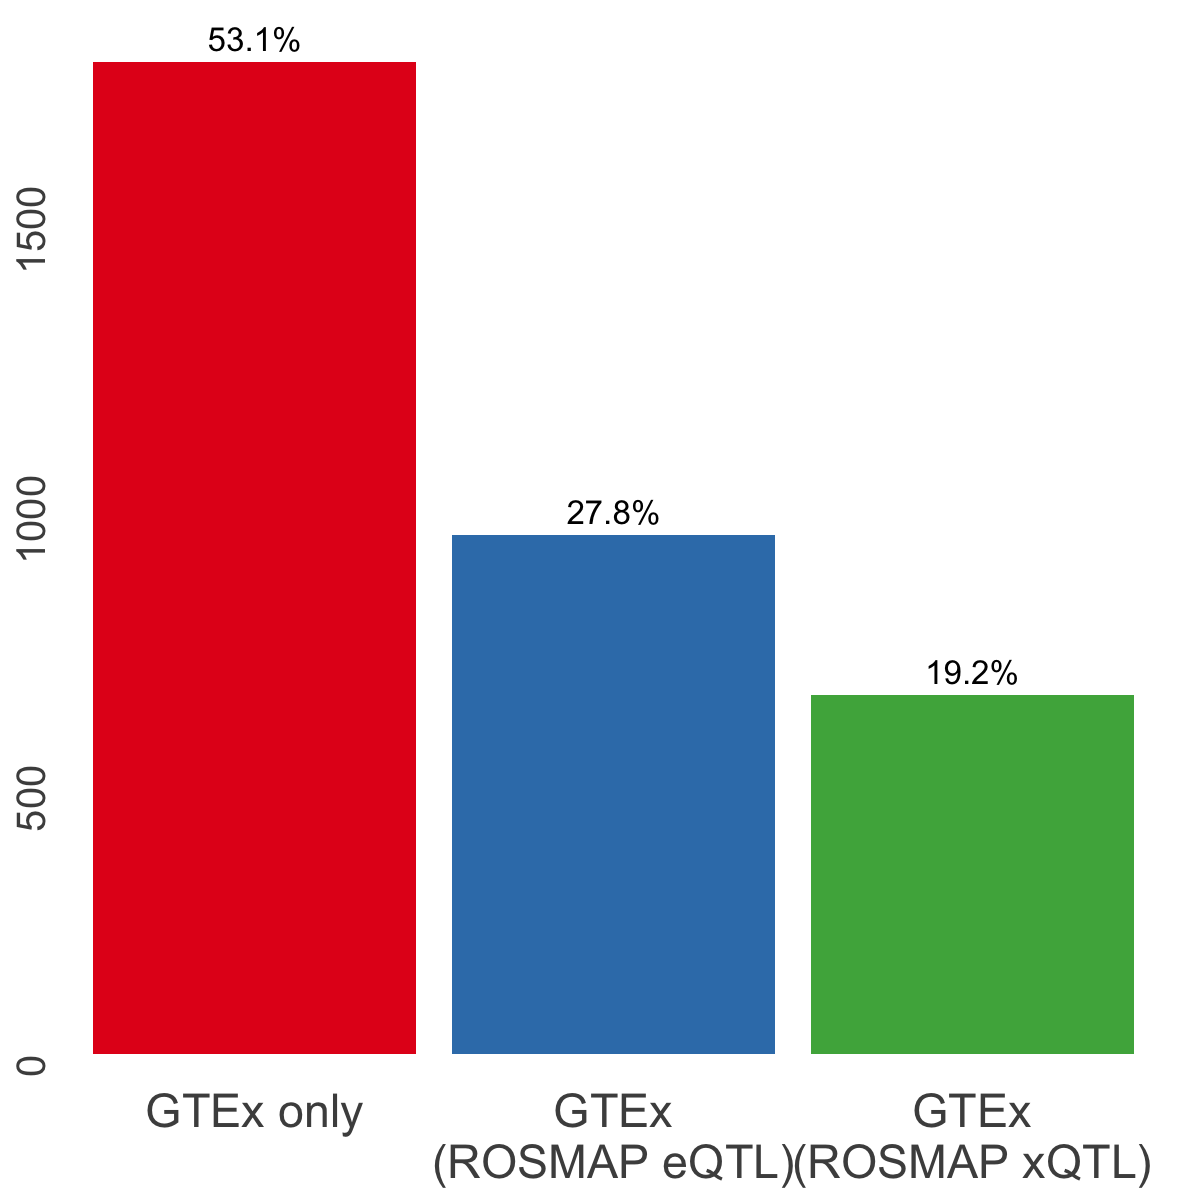

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)
p1

In [3]:
# GTEx for ROSMAP
xqtl_only <- paste0("xqtl_", which(!xqtl_cate))
xqtl_xx <- lapply(which(xqtl_cate), function(ii){
  coloc.tmp <- res_xQTL[ii,]
  coloc.phen.tmp <- paste0(coloc.tmp$colocalized_phenotypes, collapse = ",")
  ifsp <- grepl("pQTL", coloc.phen.tmp) | grepl("productive", coloc.phen.tmp)
  if (ifsp){
    return(paste0("xQTL_", ii))
  } else {
    return(paste0("eQTL_", ii))
  }
})
xqtl_xx <- unlist(xqtl_xx)
xqtl_eqtl <- xqtl_xx[grep("eQTL", xqtl_xx)]
xqtl_xqtl <- xqtl_xx[grep("xQTL", xqtl_xx)]
xqtl.info <- list("ROSMAP only" = xqtl_only,
                  "ROSMAP eQTL\n(GTEx colocalization)" = xqtl_eqtl,
                  "ROSMAP xQTL\n(GTEx colocalization)" = xqtl_xqtl)

library(ggplot2)
xqtl.df <- data.frame(
  Category = names(xqtl.info),
  Count = sapply(xqtl.info, length)
)
xqtl.df$Category <- factor(xqtl.df$Category, levels = names(xqtl.info))
xqtl.df$Proportion <- xqtl.df$Count / sum(xqtl.df$Count)
p2 <- ggplot(xqtl.df, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Set1") +
  geom_text(aes(label = scales::percent(Proportion, accuracy = 0.1)), 
            vjust = -0.5, size = 7) +
  labs(title = NULL, 
       x = NULL, 
       y = NULL) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0),
    axis.text.x = element_text(margin = margin(t = -10), size = 20), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = -10), size = 20, angle = 90), # Adjust y axis text margin
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )

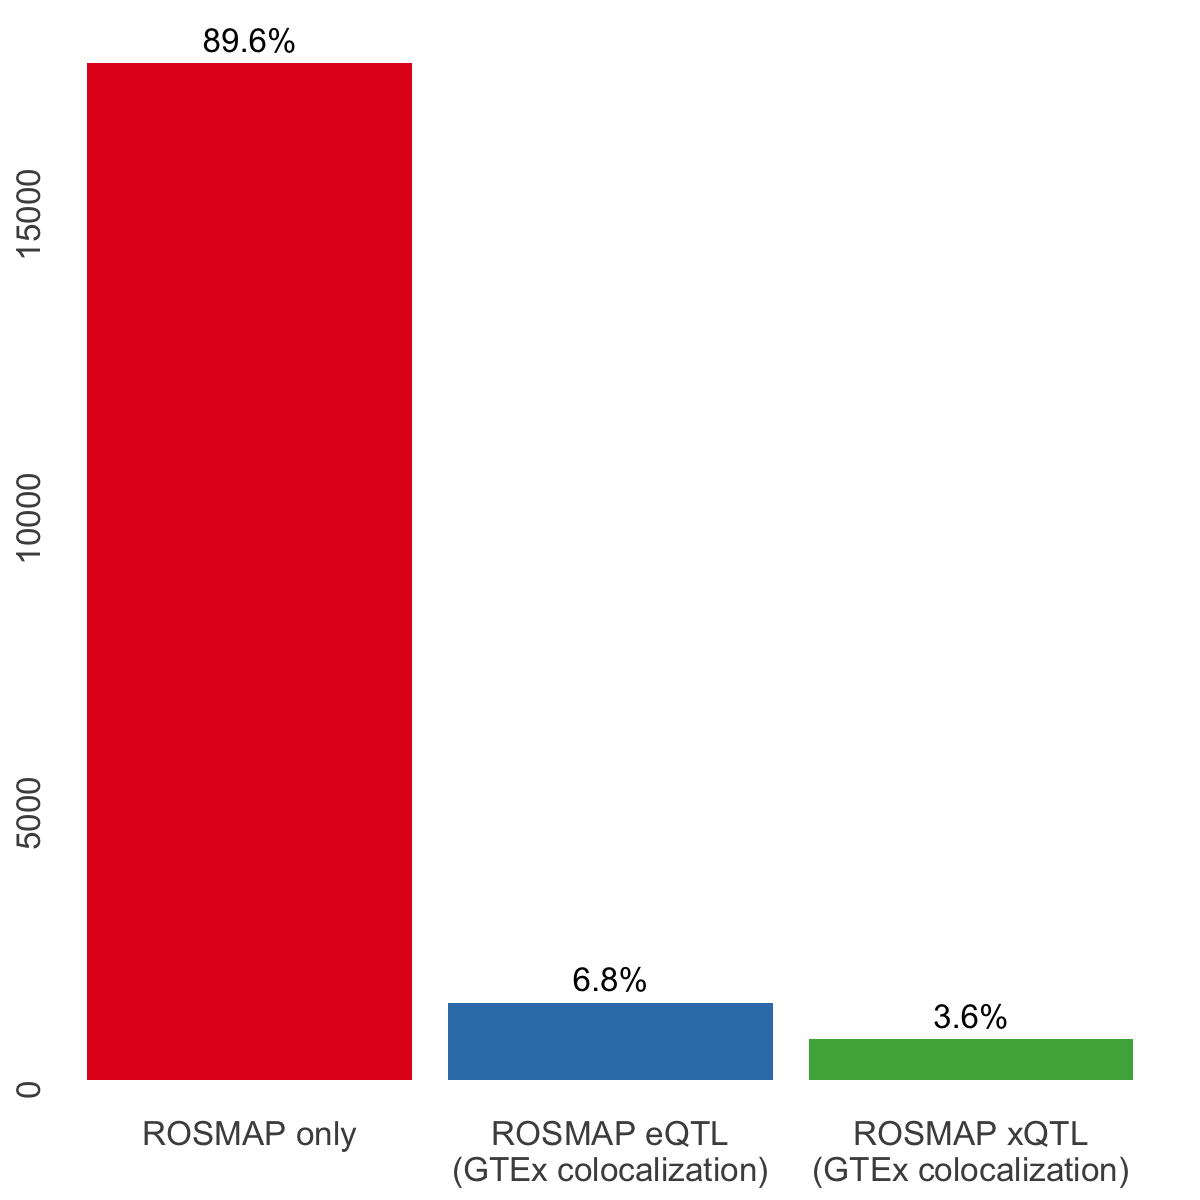

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)
p2

In [13]:
library(tidyverse)
# xQTL & GTEx overlap
GTEx_in_xQTL <- lapply(coloc_variants.GTEx.cortex, function(snp){
  tmp <- intersect(snp, ALLvariants.xQTL)
  length(tmp) != 0
})

xQTL_in_GTEx <- lapply(coloc_xQTL, function(snp){
  tmp <- intersect(snp, ALLvariants.GTEx.cortex)
  length(tmp) != 0
})

library(ggplot2)
data.cb <- data.frame(
  Source = rep(c("ROSMAP xQTL CoS", "GTEx CoS"), each = 2),
  Method = rep(c("TRUE", "FALSE"), times = 2),
  Value = c(table(unlist(xQTL_in_GTEx))[2], 
            table(unlist(xQTL_in_GTEx))[1],
            table(unlist(GTEx_in_xQTL))[2], 
            table(unlist(GTEx_in_xQTL))[1]),
  Total = rep(c(length(coloc_xQTL), length(coloc_variants.GTEx.cortex)), each = 2)
)
data.cb$Total <- as.numeric(data.cb$Total)

# Calculate percentages
data.cb <- data.cb %>%
  mutate(Percentage = round(Value / Total * 100, 1))

library(tidyverse)
library(ggplot2)
p3 <- ggplot(data.cb, aes(x = Source, y = Value, fill = Method)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = paste0(Value[1], " (", Percentage[1], "%)"),
                x = "ROSMAP xQTL CoS", y = 1000, group = Method),
            size = 3.5, color = "black") +
  geom_text(aes(label = paste0(Value[2], " (", Percentage[2], "%)"),
                x = "ROSMAP xQTL CoS", y = 11000, group = Method),
            size = 3.5, color = "black") +
  geom_text(aes(label = paste0(Value[3], " (", round(Percentage[3],1), "%)"),
                x = "GTEx CoS", y = 800, group = Method),
            size = 3.5, color = "black") +
  geom_text(aes(label = paste0(Value[4], " (", round(Percentage[4],1), "%)"),
                x = "GTEx CoS", y = 2500, group = Method),
            size = 3.5, color = "black") +
  scale_fill_manual(values = c("#99CC99", "#F4A582"),
                    labels = c("TRUE", "FALSE")) +
  labs(title = "",  x = "", y = "", fill = "") +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text(size = 0),
    axis.title.x = element_text(margin = margin(t = -10), size = 0), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 0, face = "bold"), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = -10), size = 24), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = -10), size = 0), # Adjust y axis text margin
    legend.position = "none",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  )


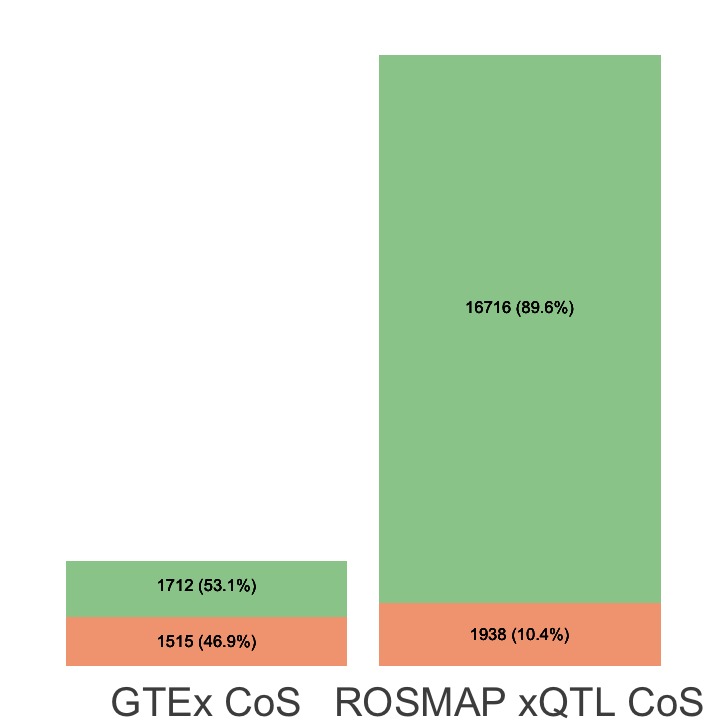

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6)
p3

## Figure S8c
Properties of genes with multiple causal variants, including log likelihood changes between primary and secondary CoS, the relationship between the number of colocalized traits and log likelihood changes, and the number of pairs of primary and secondary CoS across brain tissue eQTLs. Error bars denote 95% confidence intervals.

In [15]:
res = readRDS("../../Main_Figures/Figure_3/data/gtex_only_colocalization.rds")
coloc_pheno_numbers <- sapply(res$colocalized_phenotypes, function(cp){
  length(strsplit(cp, "; ")[[1]])
})
res <- res %>% mutate(num_phen = coloc_pheno_numbers)
res <- within(res, {
  num_phen <- factor(num_phen, levels = c(1,2,3,4,5,6,7,8,9,10,11,12,13))
})
library(ggsci)
color <- c(pal_npg()(10), pal_d3()(10))
p1 <- ggplot(res, aes(x = num_phen, y = profile_change, fill = num_phen)) +
  geom_boxplot(color = "black") +
  scale_color_manual(values = color) +
  labs(title = "",
       x = "Number of colocalized traits",
       y = "Change in overall log likelihood",
       fill = "") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    legend.position = "",
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) +
  guides(fill = guide_legend(nrow = 1))

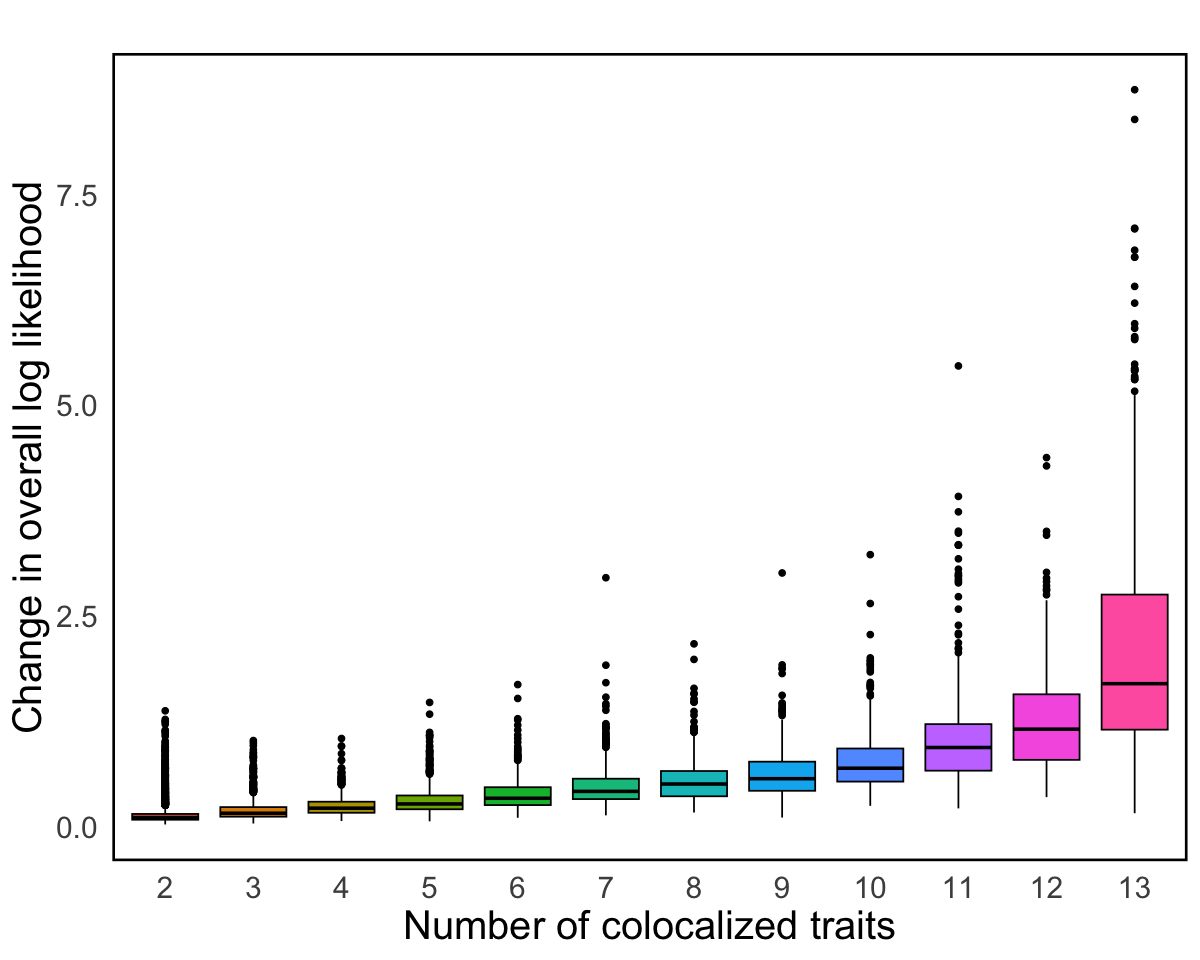

In [17]:
options(repr.plot.width = 10, repr.plot.height = 8)
p1

In [19]:
result = readRDS("Figure_S8c_1.rds")
dim_max <- max(c(result$primary_loglik, result$secondary_loglik))
p2 <- ggplot(result, aes(x = primary_loglik, y = secondary_loglik)) +
  geom_point(size = 2, color = "grey50") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red", linewidth = 2) +
  coord_fixed(ratio = 1, xlim = c(0, dim_max), ylim = c(0, dim_max)) +
  labs(title = "",
       x = "Change in Log Likelihood\n in Primary CoS",
       y = "Change in Log Likelihood\n in Secondary CoS") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(margin = margin(t = 5), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5))

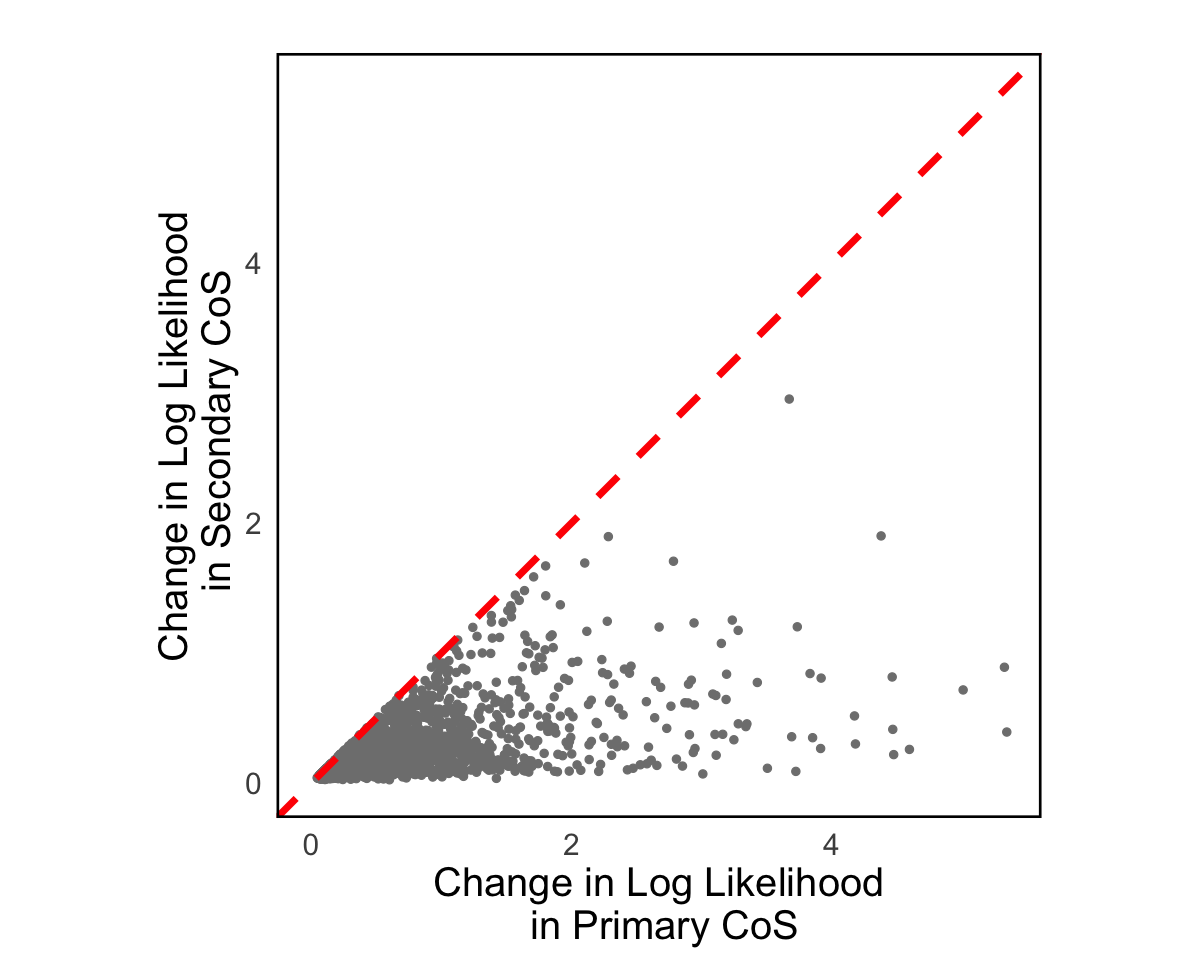

In [20]:
options(repr.plot.width = 10, repr.plot.height = 8)
p2

In [22]:
library(RColorBrewer)
heatmap_data = readRDS("Figure_S8c_2.rds")
# Create the heatmap with ggplot2
values <- c(seq(0, 0.15, 0.005), 0.2, 0.3, 0.5, 0.75, 1)
colors <- colorRampPalette(c("white", brewer.pal(n = 9, name = 'YlOrRd')))(45)[1:length(values)]
p3 <- ggplot(heatmap_data, aes(x = primary_count, y = secondary_count, fill = count)) +
  geom_tile(color = "black", linewidth = 1) +  # Add black boundary for each cell
  geom_text(aes(label = count), color = "black", size = 5.5) +
  scale_fill_gradientn(
    colors = colors,
    values = values,
    breaks = c(0, 20, 40, 60, 80, 100, 300, 500),
    limits = c(0, max(heatmap_data$count))
  ) +
  scale_x_continuous(breaks = 2:13) +
  scale_y_continuous(breaks = 2:13) +
  labs(x = "Number of shared tissues\n in primary CoS",
       y = "Number of shared tissues\n in secondary CoS",
       title = "",
       fill = "Count") +
  theme_minimal() +
  theme(
    legend.position = "none",
    panel.grid = element_blank(),
    axis.title.x = element_text(size = 24),
    axis.title.y = element_text(size = 24),
    axis.text.x = element_text(size = 18, margin = margin(t = -10)),
    axis.text.y = element_text(size = 18, margin = margin(r = -10)),
    plot.title = element_text(size = 0, face = "bold", vjust = -1, hjust = 0.5)
  )


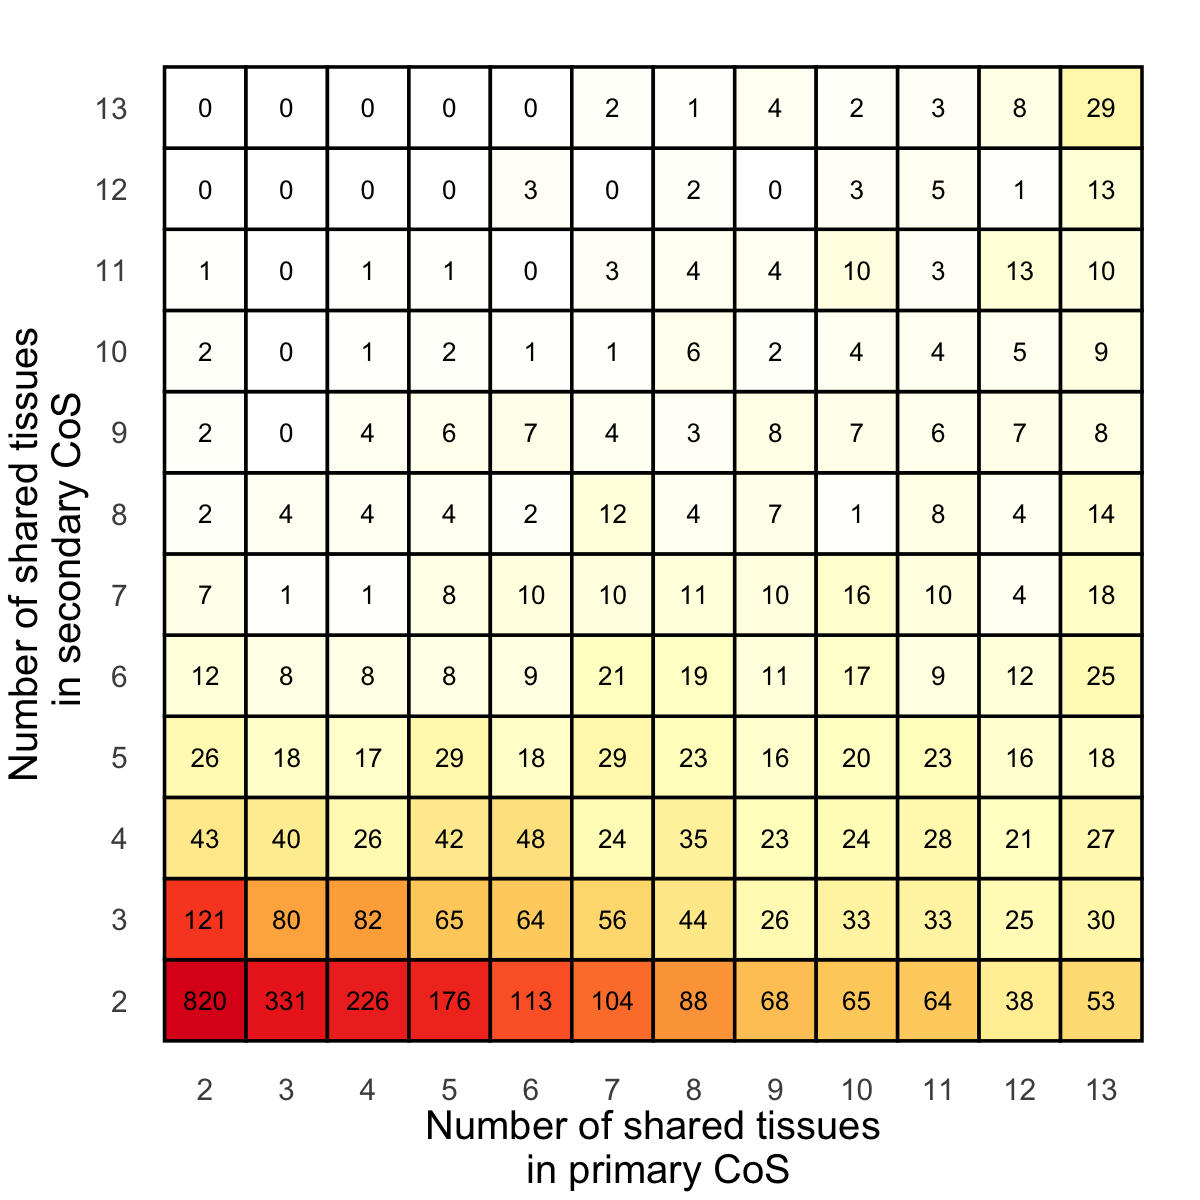

In [24]:
options(repr.plot.width = 10, repr.plot.height = 10)
p3